# Exploring COVID-19 cases in PA

The novel coronavirus, SARS-COV-2, and the associated illness COVID-19, was first reported in Wuhan China in late December 2019.The World Health Organization (WHO), on the 30th of January, observing a rapid spread and rising number of cases in China and in other countries, declared COVID-19 a Public Health Emergency of International Concern (PHEIC). And on March 12th the WHO declared SARS-COV-2 a pandemic. 

All Departments of Health (DOH) in the United States are tracking the spread of COVID-19.
This includes Pennsylvania (PA). 

We have data on the number of cases and deaths in PA from epidemic week 202010 to present. 
Lets explore this dataset, in particular, lets plot the number of new cases and number of cumulative cases per week  by county. 
The number of new cases per week, the incidence, gives public health officials (PHOs) information about the probability an individual will be infected. 
The cumulative number of cases, the disease prevalence, gives PHOs information about the overall burden of COVID-19 on the state. 

Our steps to plot the 1-week incidence and overall prevalence of COVID-19 cases are:
* Load data into python.
* Extract the DOH new cases.
* Create a new variable that is the cumulative number of cases.
* Plot epidemic week by number of new cases.
* Plot epidemic week by the cumulative number of cases. 
* Discuss as a group. 

# Load data into python 

In [60]:
casesData = pd.read_csv("~/science/syndromicSurv/data/cases/PATrainingDataCases.csv")

# Extract DOH New Cases

In [61]:
maxtrainingweek = casesData.trainingweek.max()
dohCasesAndEpiWeek = casesData[casesData.trainingweek==maxtrainingweek] # subset to the most recent training week

# Only include two columns in our data set: the epiweek and DOH number of new cases
dohCasesAndEpiWeek = dohCasesAndEpiWeek[ ["epiweek","fips","census","dohweb__numnewpos"] ] 

# Create a new variable: Cumulative cases

In [62]:
# the function in numpy (np) cumsum is the cumulative sum over a variable.

def addCumulativeCases(subsetOfData):
    subsetOfData.loc[:,'cumulativeCases'] = np.cumsum(subsetOfData.dohweb__numnewpos)   
    return subsetOfData    
dohCasesAndEpiWeek = dohCasesAndEpiWeek.groupby(['fips']).apply( addCumulativeCases )

# Plot the number of new cases over time

[Text(0, 0, '202008'),
 Text(0, 0, '202010'),
 Text(0, 0, '202012'),
 Text(0, 0, '202014'),
 Text(0, 0, '202016'),
 Text(0, 0, '202018'),
 Text(0, 0, '202020'),
 Text(0, 0, '202022'),
 Text(0, 0, '202024')]

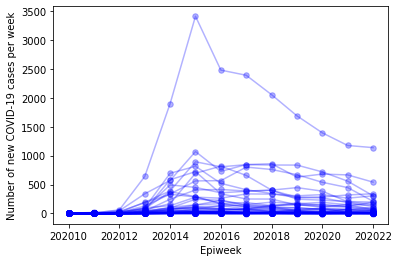

In [63]:
fig,ax = plt.subplots() # setup a plotting environment

# break our data into pieces by FIPS. The subset of data for a single FIP is set as fipSpecificData
for fip, fipSpecificData in dohCasesAndEpiWeek.groupby(['fips']):
    ax.plot( fipSpecificData.epiweek, fipSpecificData.dohweb__numnewpos, color = "b", alpha=0.3) # plot a line
    ax.scatter(fipSpecificData.epiweek, fipSpecificData.dohweb__numnewpos, s= 30, color = "b", alpha=0.3) # plot points
    
# Lets label our plot axes. 
ax.set_xlabel("Epiweek")
ax.set_ylabel("Number of new COVID-19 cases per week")

ax.set_xticklabels( [ str(int(x)) for x in ax.get_xticks()]  ) # dont worry about it.

# Plot the cumulative number of cases over time

[Text(0, 0, '202008'),
 Text(0, 0, '202010'),
 Text(0, 0, '202012'),
 Text(0, 0, '202014'),
 Text(0, 0, '202016'),
 Text(0, 0, '202018'),
 Text(0, 0, '202020'),
 Text(0, 0, '202022'),
 Text(0, 0, '202024')]

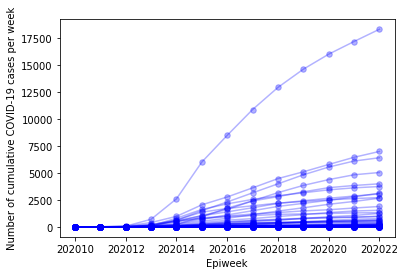

In [64]:
fig,ax = plt.subplots() # setup a plotting environment

# break our data into pieces by FIPS. The subset of data for a single FIP is set as fipSpecificData
for fip, fipSpecificData in dohCasesAndEpiWeek.groupby(['fips']):
    ax.plot( fipSpecificData.epiweek, fipSpecificData.cumulativeCases, color = "b", alpha=0.3) # plot a line
    ax.scatter(fipSpecificData.epiweek, fipSpecificData.cumulativeCases, s= 30, color = "b", alpha=0.3) # plot points
    
# Lets label our plot axes. 
ax.set_xlabel("Epiweek")
ax.set_ylabel("Number of cumulative COVID-19 cases per week")

ax.set_xticklabels( [ str(int(x)) for x in ax.get_xticks()]  ) # dont worry about it.

# Plot incidence and prevalence together

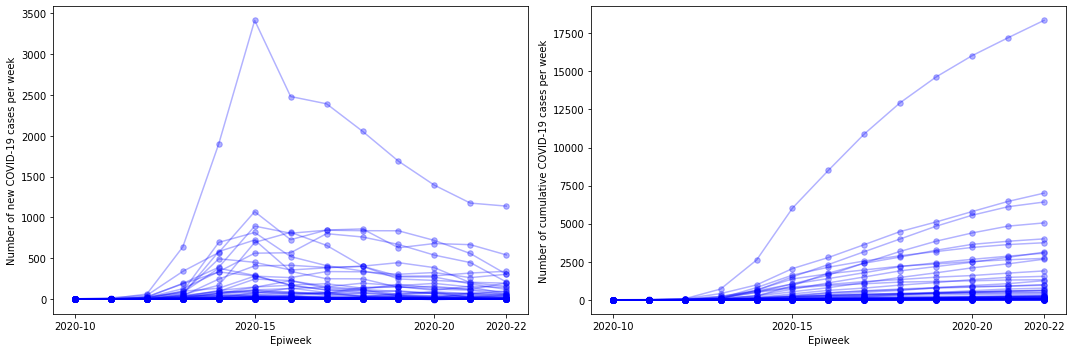

In [65]:
fig,axs = plt.subplots(1,2) # setup a plotting environment

ax=axs[0]
# break our data into pieces by FIPS. The subset of data for a single FIP is set as fipSpecificData
for fip, fipSpecificData in dohCasesAndEpiWeek.groupby(['fips']):
    ax.plot( fipSpecificData.epiweek, fipSpecificData.dohweb__numnewpos, color = "b", alpha=0.3) # plot a line
    ax.scatter(fipSpecificData.epiweek, fipSpecificData.dohweb__numnewpos, s= 30, color = "b", alpha=0.3) # plot points
    
# Lets label our plot axes. 
ax.set_xlabel("Epiweek")
ax.set_ylabel("Number of new COVID-19 cases per week")

ax.set_xticks([202010, 202015, 202020, 202022])
ax.set_xticklabels(["2020-10", "2020-15" , "2020-20", "2020-22"])

ax=axs[1]
# break our data into pieces by FIPS. The subset of data for a single FIP is set as fipSpecificData
for fip, fipSpecificData in dohCasesAndEpiWeek.groupby(['fips']):
    ax.plot( fipSpecificData.epiweek, fipSpecificData.cumulativeCases, color = "b", alpha=0.3) # plot a line
    ax.scatter(fipSpecificData.epiweek, fipSpecificData.cumulativeCases, s= 30, color = "b", alpha=0.3) # plot points
    
# Lets label our plot axes. 
ax.set_xlabel("Epiweek")
ax.set_ylabel("Number of cumulative COVID-19 cases per week")

ax.set_xticks([202010, 202015, 202020, 202022])
ax.set_xticklabels(["2020-10", "2020-15" , "2020-20", "2020-22"])

fig.set_tight_layout(True)
fig.set_size_inches(15,5)

What is missing here?
Do these numbers tell us something useful?
Is there a way to make these numbers more useful?

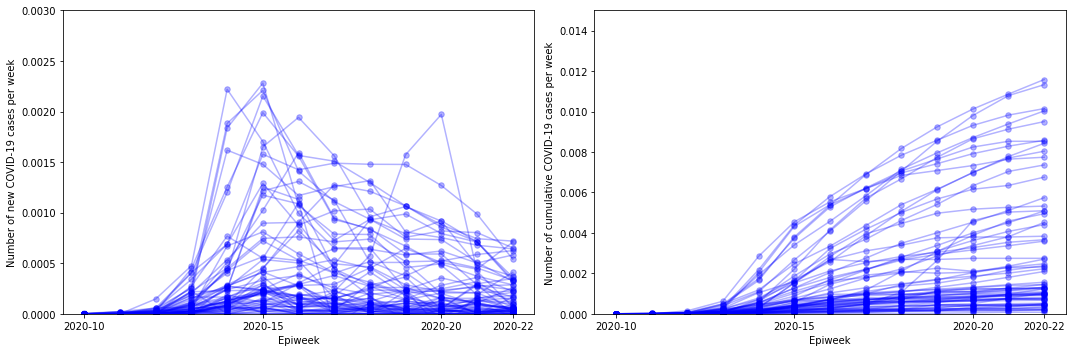

In [66]:
dohCasesAndEpiWeek["newFraction"] = dohCasesAndEpiWeek.dohweb__numnewpos/dohCasesAndEpiWeek.census
dohCasesAndEpiWeek["cuumFraction"] = dohCasesAndEpiWeek.cumulativeCases/dohCasesAndEpiWeek.census

fig,axs = plt.subplots(1,2) # setup a plotting environment

ax=axs[0]
# break our data into pieces by FIPS. The subset of data for a single FIP is set as fipSpecificData
for fip, fipSpecificData in dohCasesAndEpiWeek.groupby(['fips']):
    ax.plot(   fipSpecificData.epiweek, fipSpecificData.newFraction, color = "b", alpha=0.3) # plot a line
    ax.scatter(fipSpecificData.epiweek, fipSpecificData.newFraction, s= 30, color = "b", alpha=0.3) # plot points
    
# Lets label our plot axes. 
ax.set_xlabel("Epiweek")
ax.set_ylabel("Number of new COVID-19 cases per week")

ax.set_xticks([202010, 202015, 202020, 202022])
ax.set_xticklabels(["2020-10", "2020-15" , "2020-20", "2020-22"])

ax.set_ylim(0,0.003)

ax=axs[1]
# break our data into pieces by FIPS. The subset of data for a single FIP is set as fipSpecificData
for fip, fipSpecificData in dohCasesAndEpiWeek.groupby(['fips']):
    ax.plot(   fipSpecificData.epiweek, fipSpecificData.cuumFraction, color = "b", alpha=0.3) # plot a line
    ax.scatter(fipSpecificData.epiweek, fipSpecificData.cuumFraction, s= 30, color = "b", alpha=0.3) # plot points
    
# Lets label our plot axes. 
ax.set_xlabel("Epiweek")
ax.set_ylabel("Number of cumulative COVID-19 cases per week")

ax.set_xticks([202010, 202015, 202020, 202022])
ax.set_xticklabels(["2020-10", "2020-15" , "2020-20", "2020-22"])

ax.set_ylim(0,0.015)

fig.set_tight_layout(True)
fig.set_size_inches(15,5)

Is this any better? Lets discuss